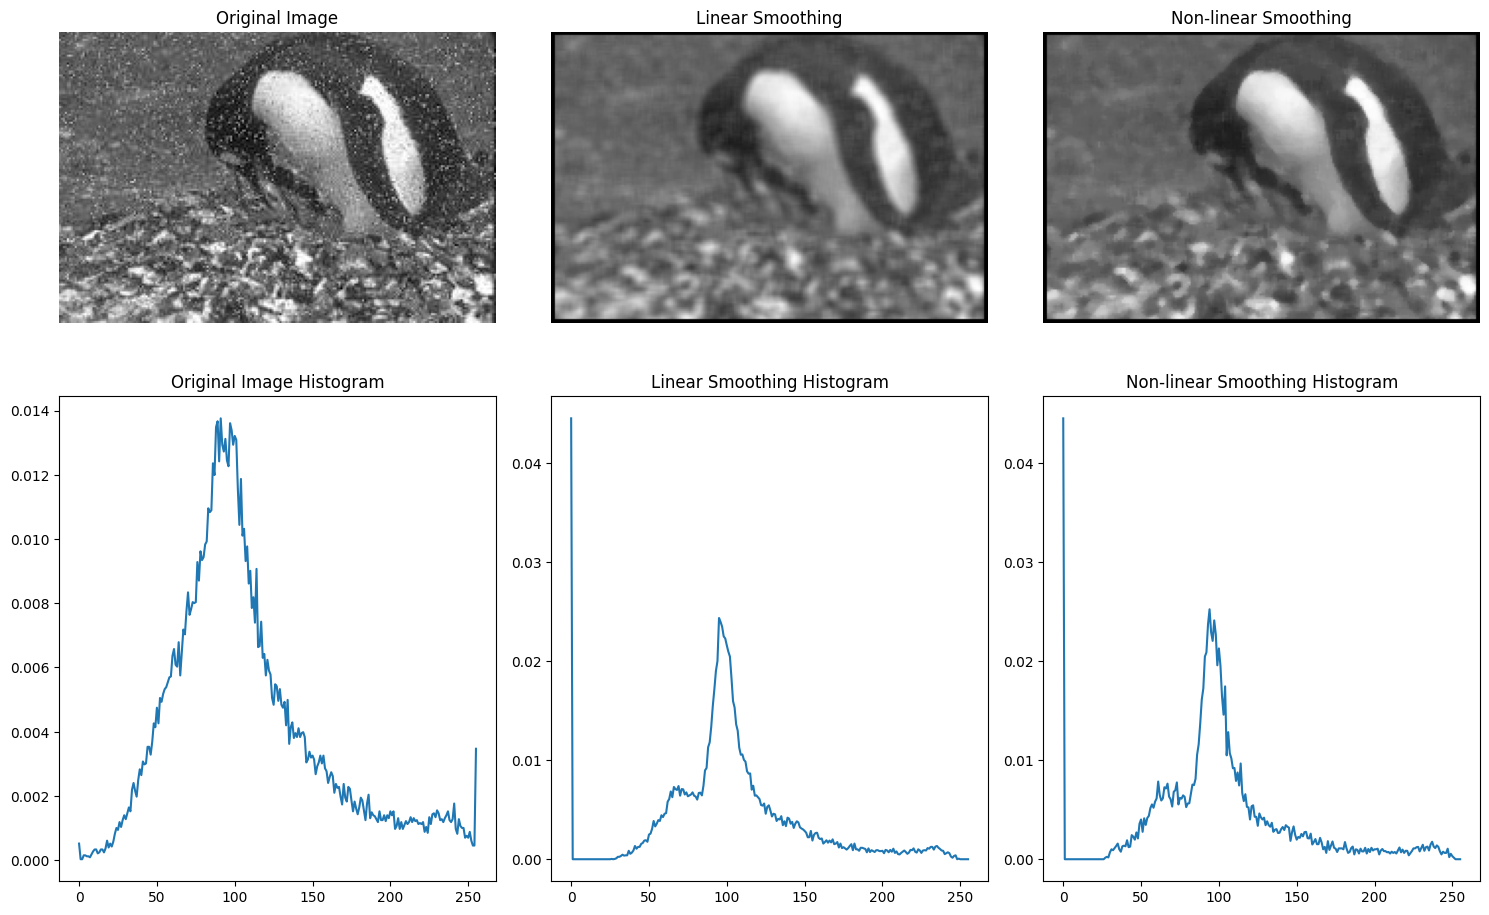

Correlation Coefficient: 0.9801424539305977
Bhattacharyya Distance: 0.007358273690786864


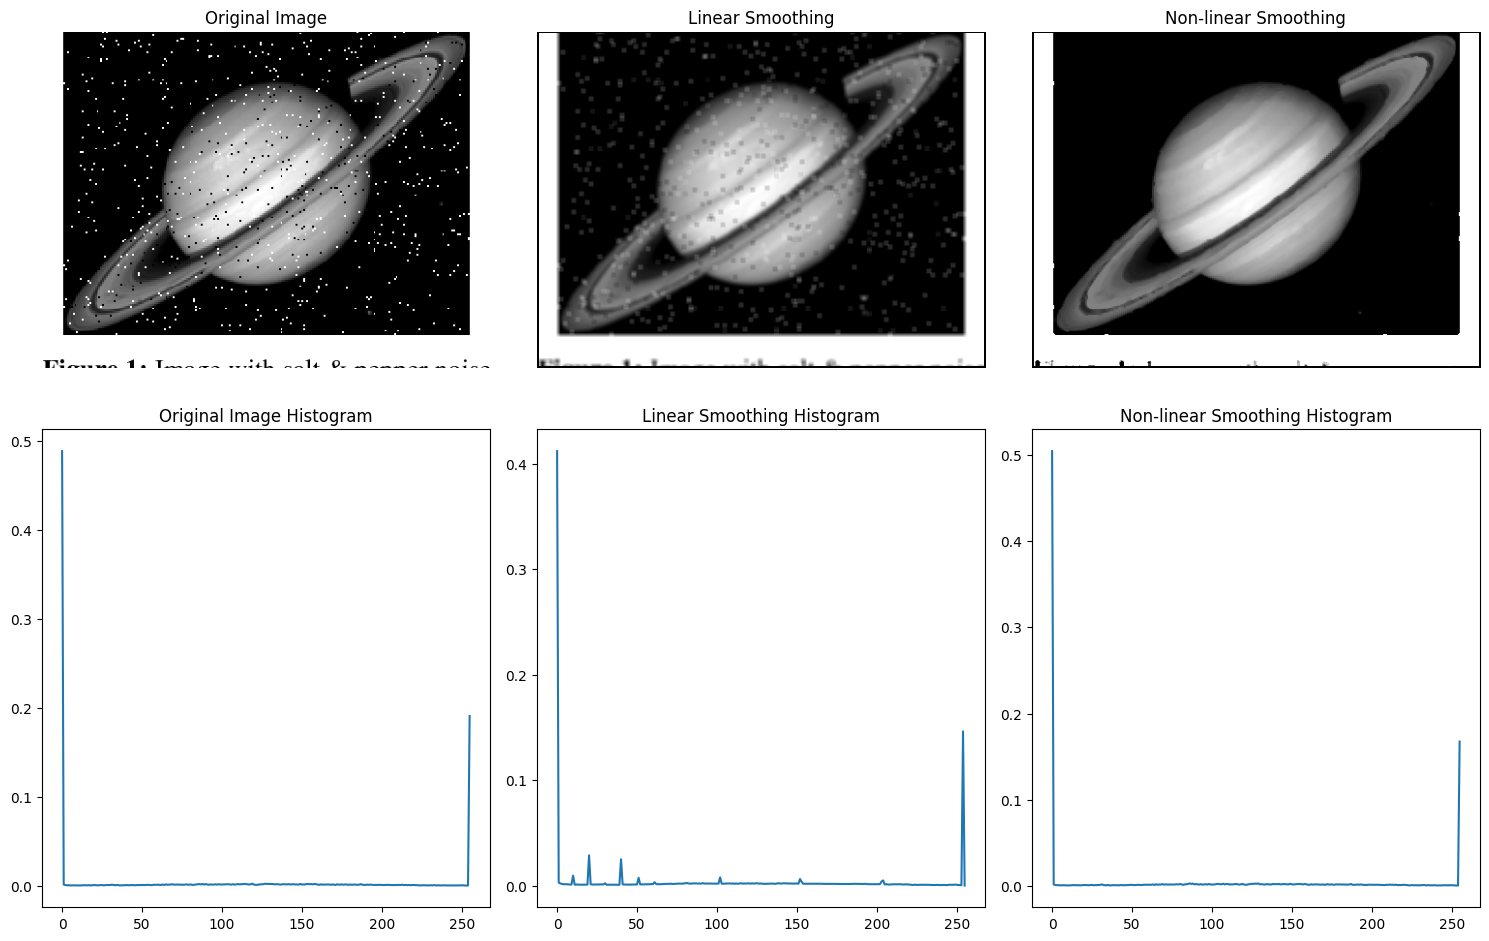

Correlation Coefficient: 0.8895172726705761
Bhattacharyya Distance: 0.1999976346883798


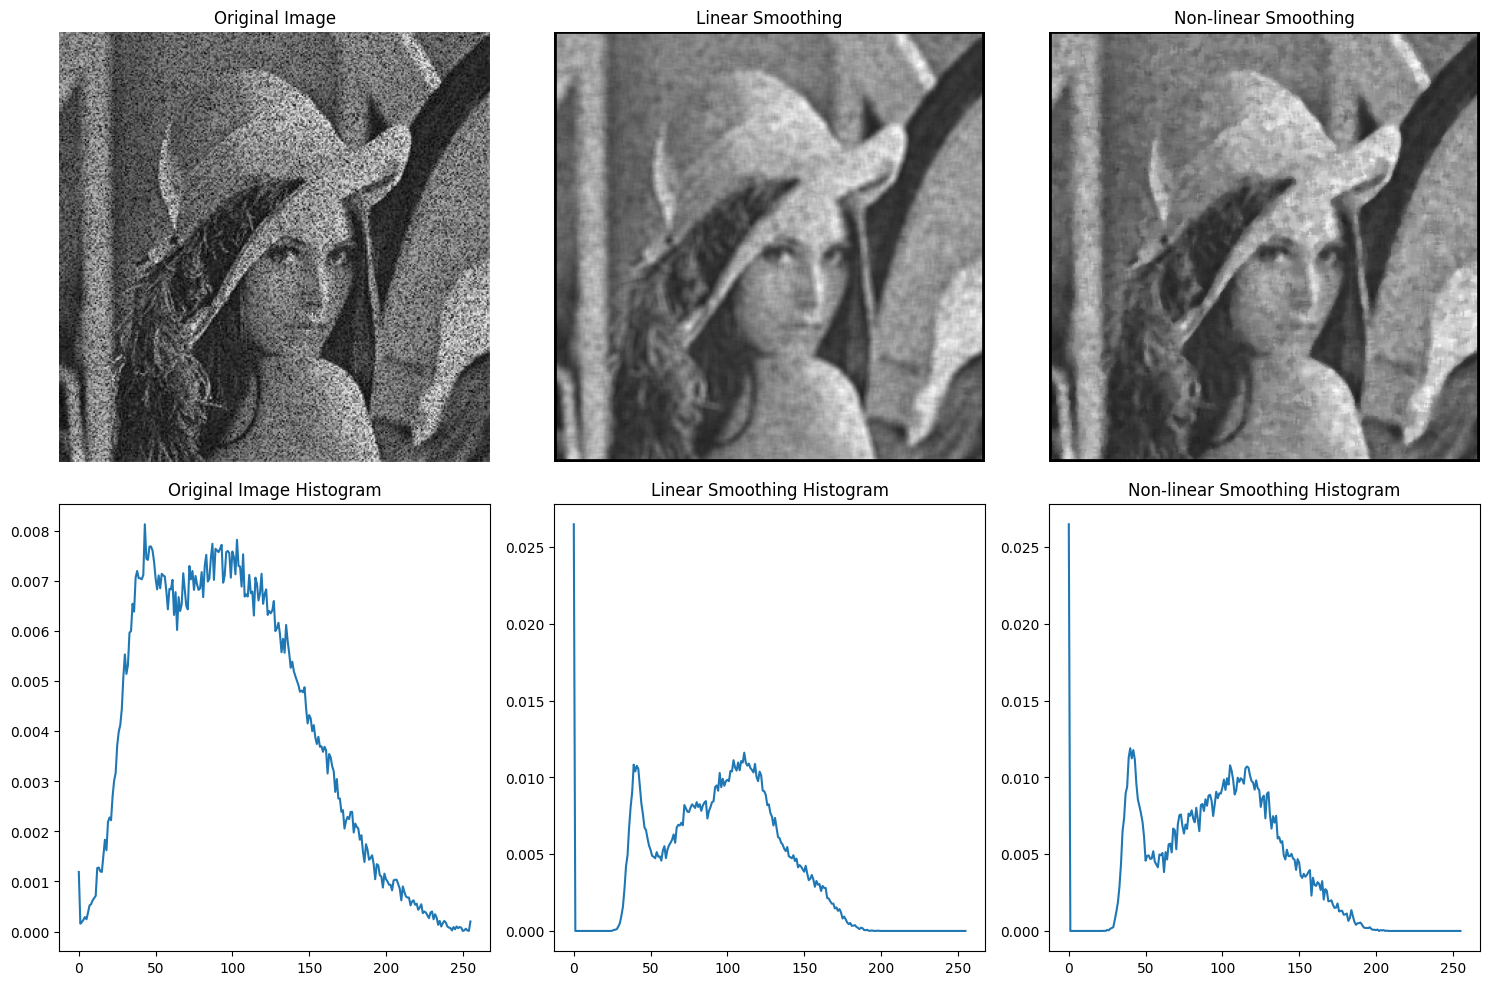

Correlation Coefficient: 0.9876225332899278
Bhattacharyya Distance: 0.0038622403795847363


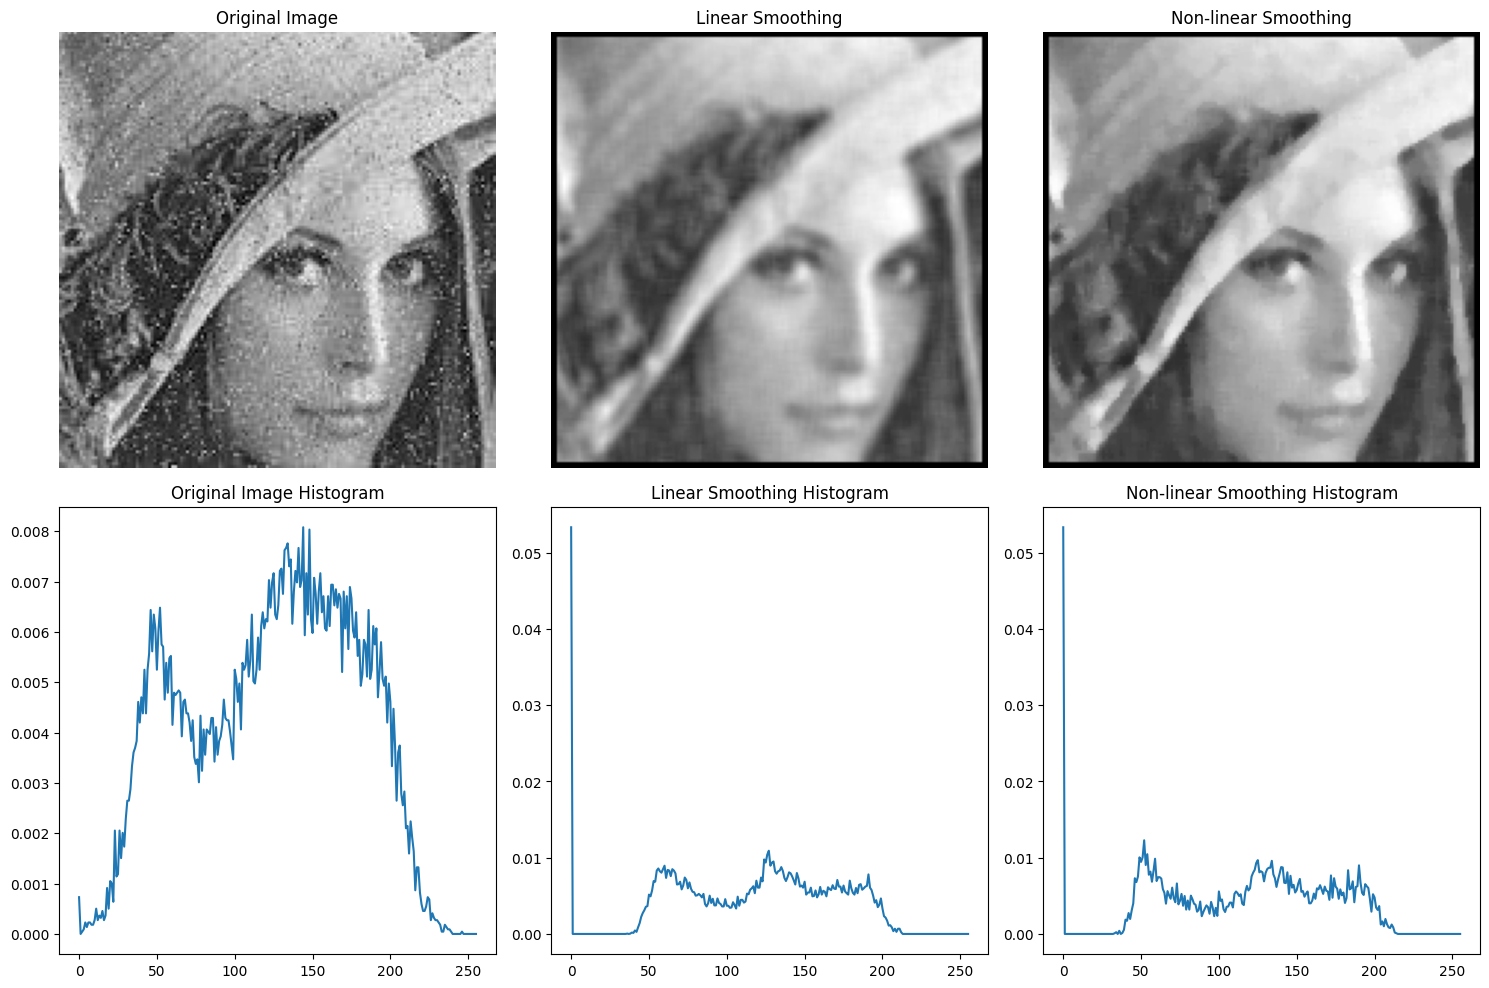

Correlation Coefficient: 0.9516982941175802
Bhattacharyya Distance: 0.012588718902020284


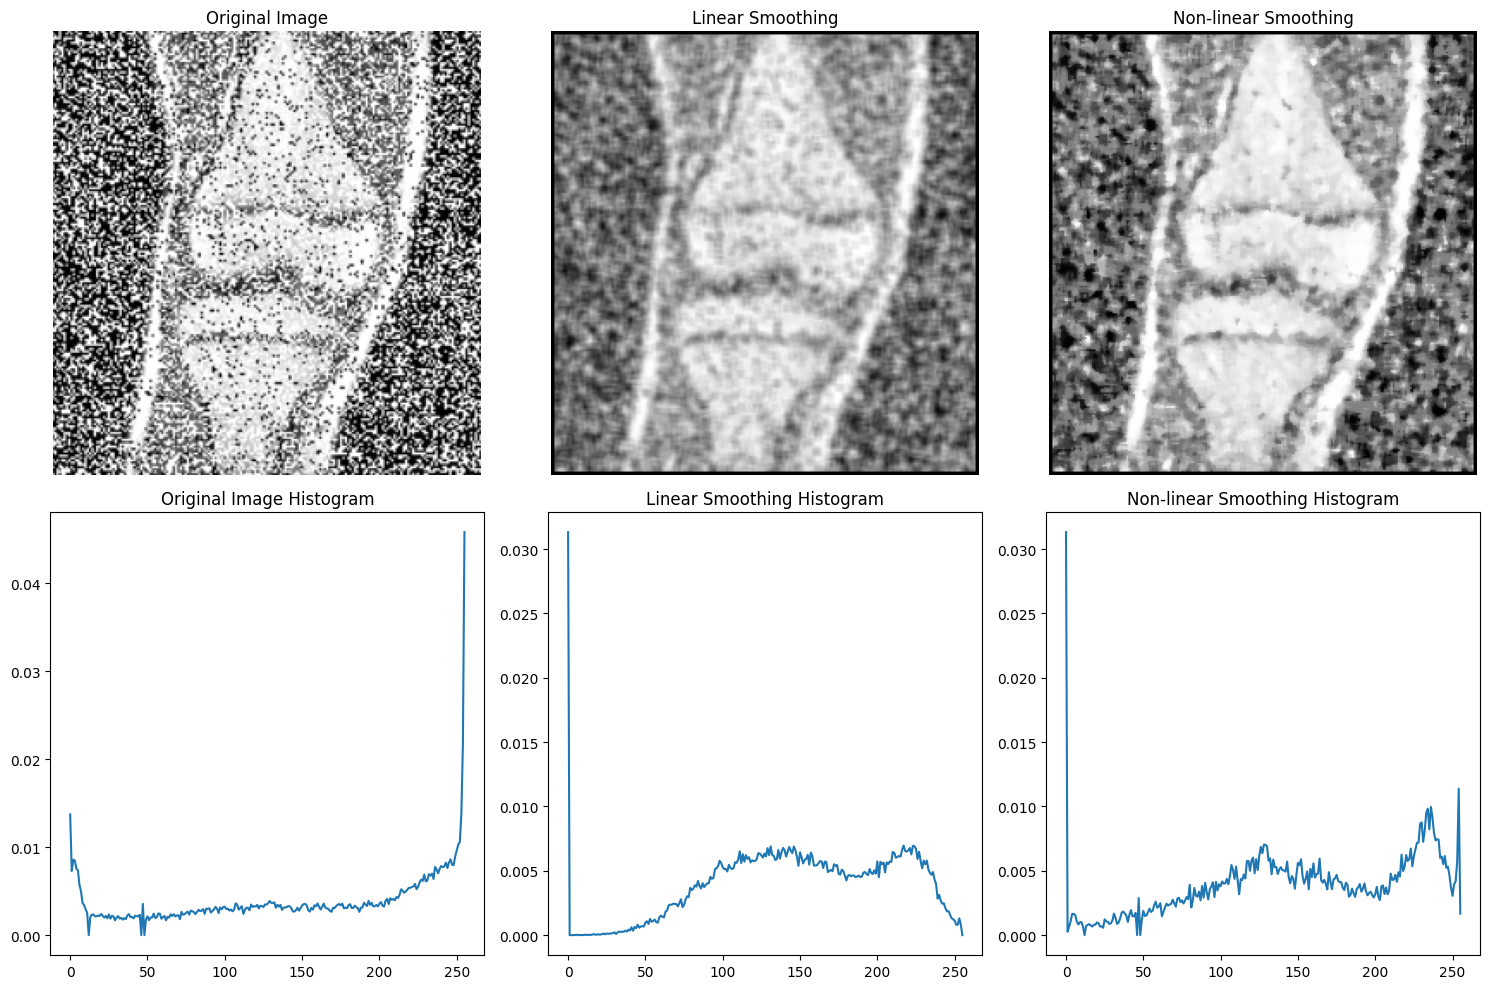

Correlation Coefficient: 0.8027748937155728
Bhattacharyya Distance: 0.03589928112290939


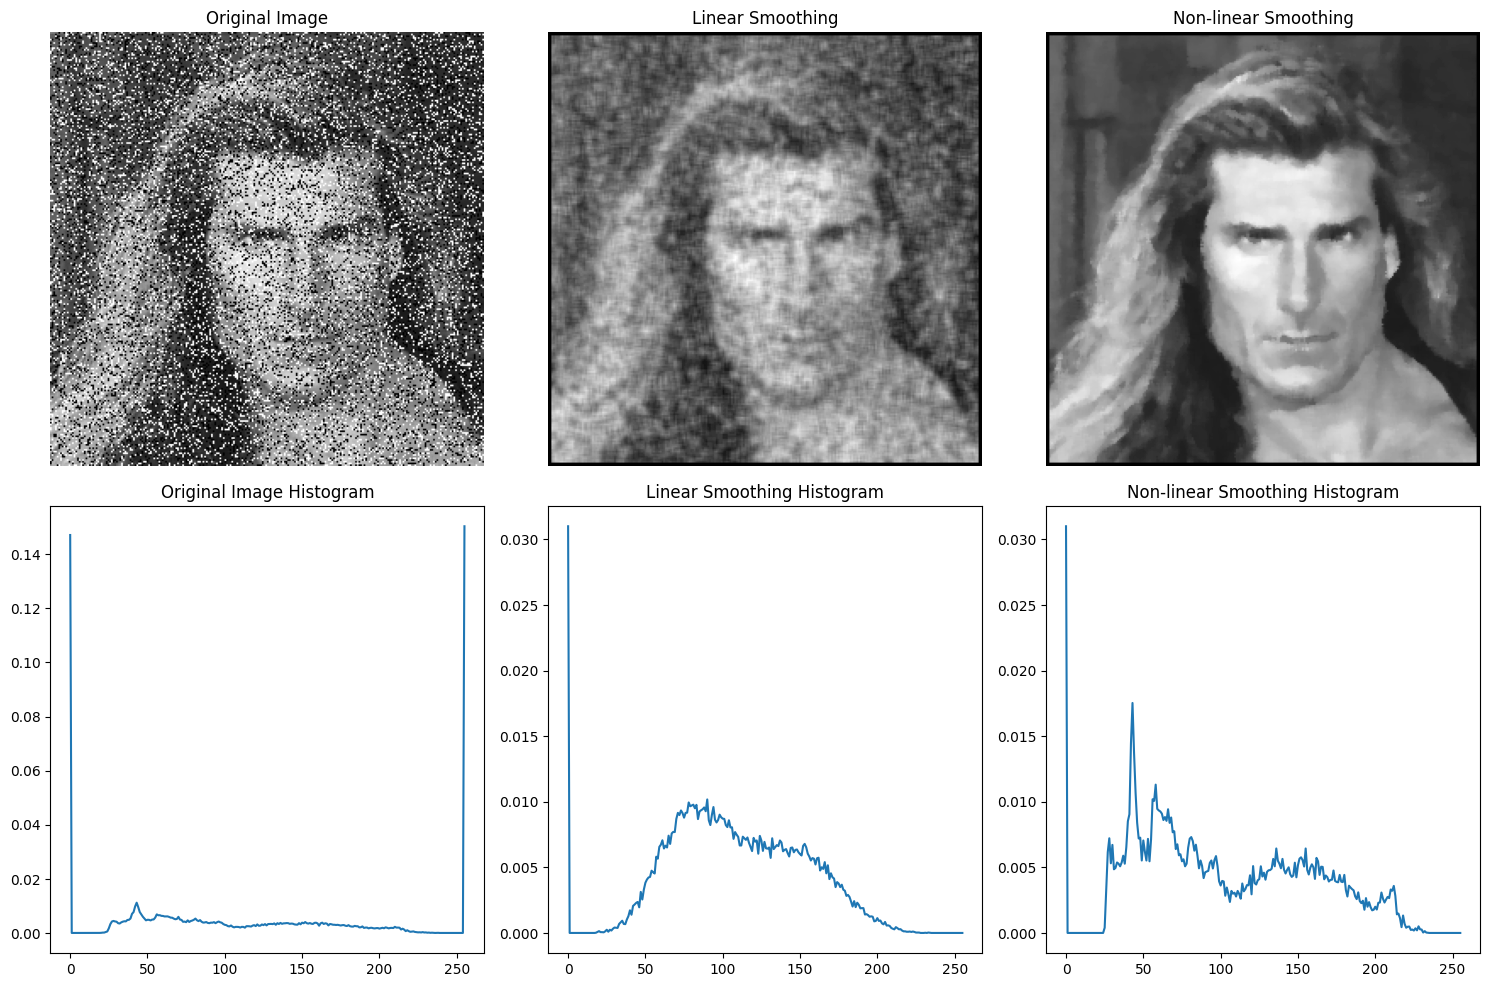

Correlation Coefficient: 0.6600310762613221
Bhattacharyya Distance: 0.06773825366907262


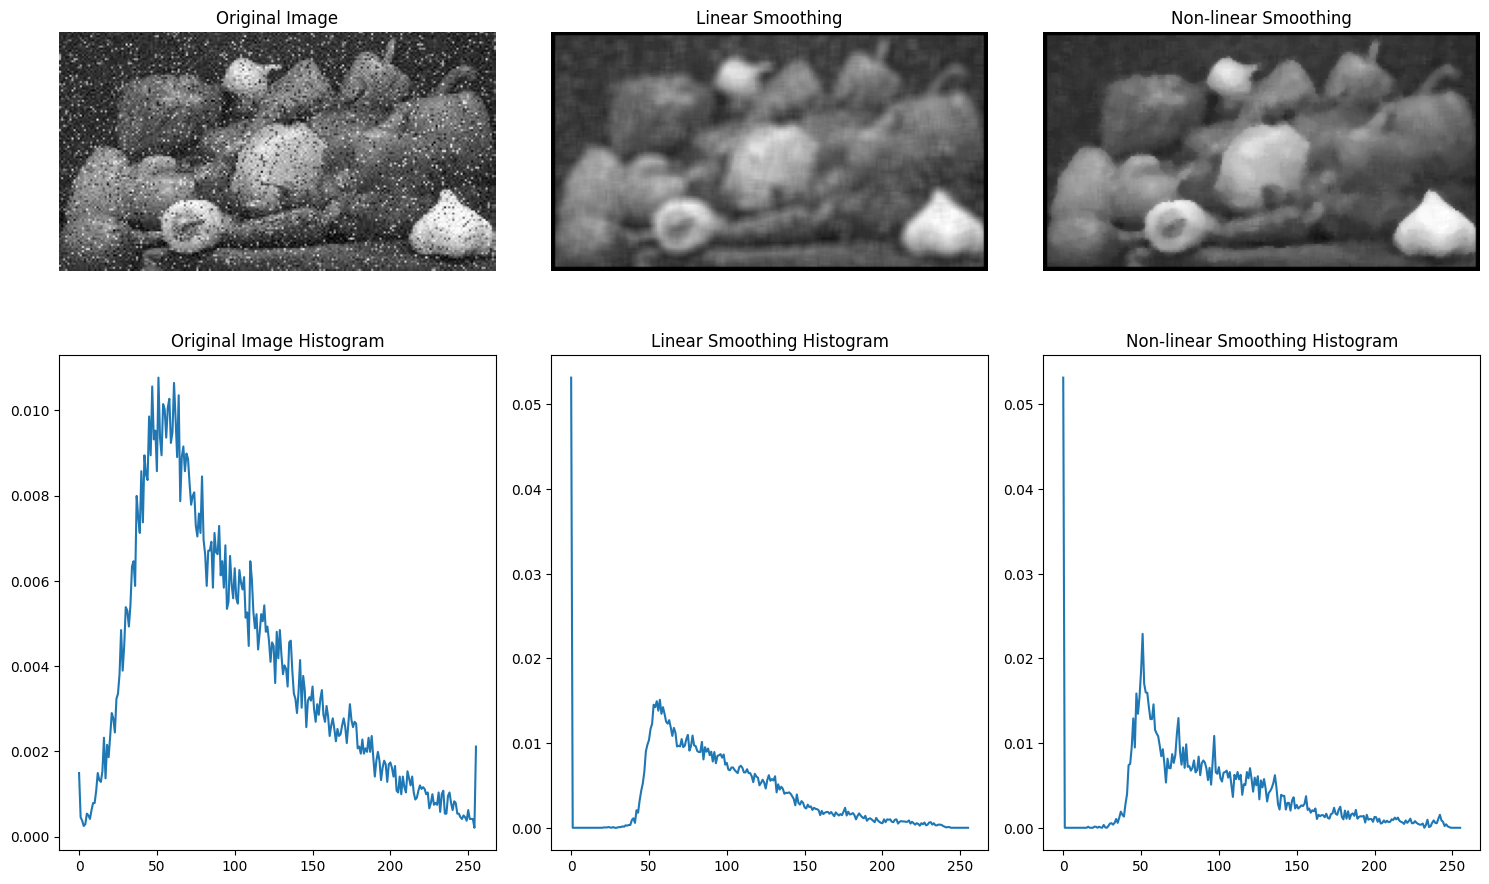

Correlation Coefficient: 0.9324190514477924
Bhattacharyya Distance: 0.019403941864493235


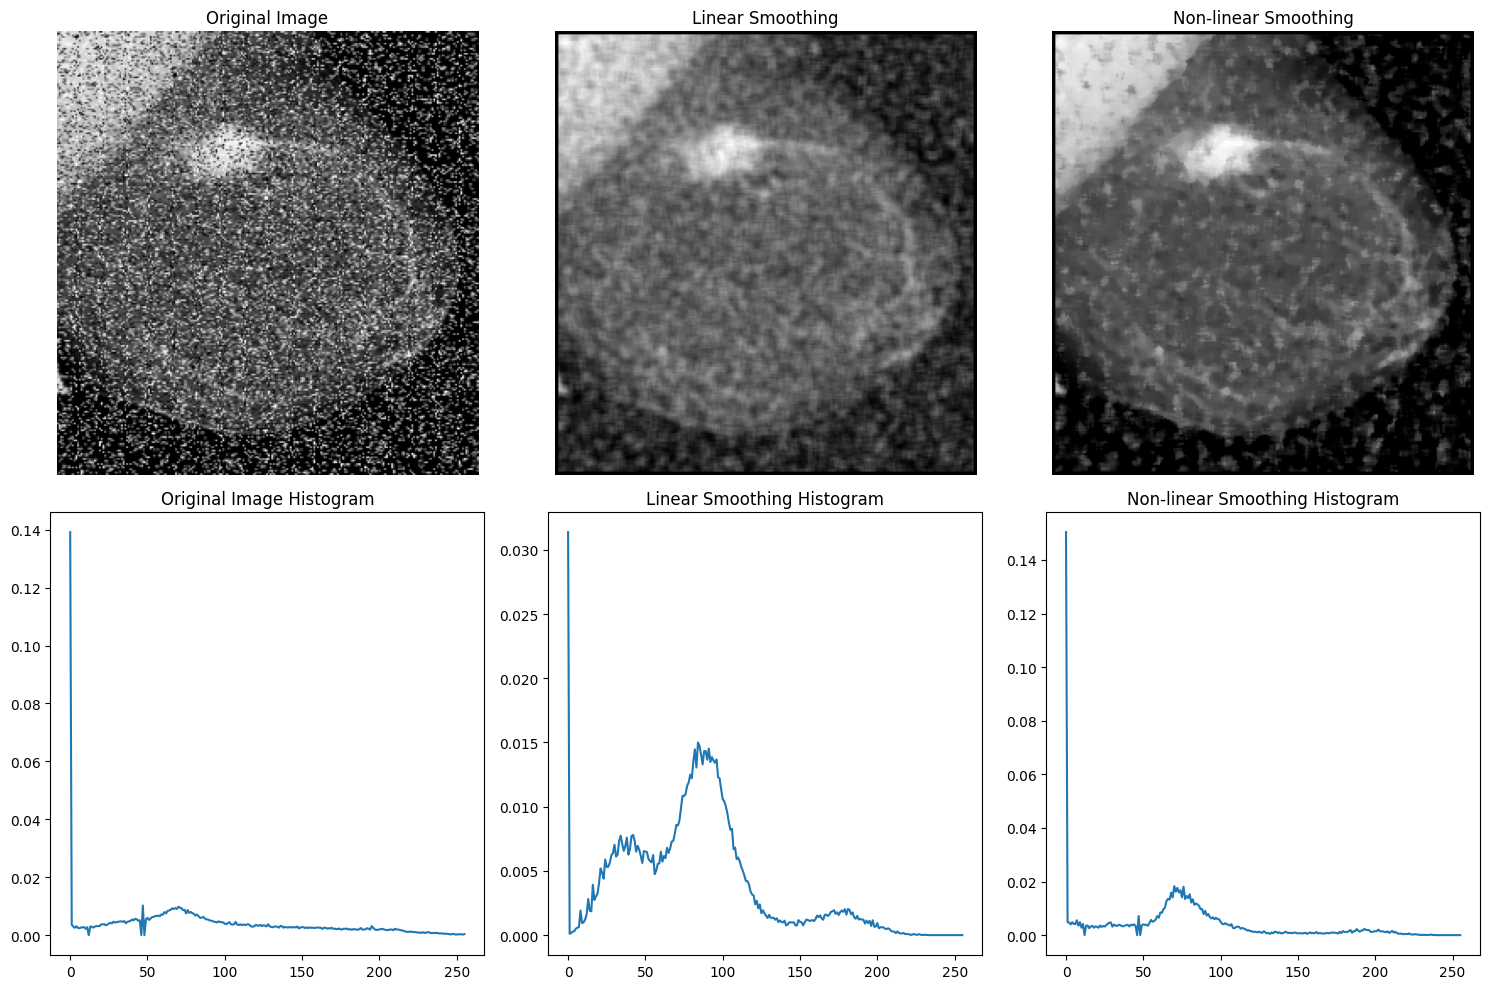

Correlation Coefficient: 0.6388542447015433
Bhattacharyya Distance: 0.07562710786877165


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform linear smoothing
def linear_smoothing(image):
    kernel = np.ones((5, 5), dtype=np.float32) / 25
    rows, cols = image.shape
    smoothed_image = np.zeros_like(image, dtype=np.float32)
    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            smoothed_image[i, j] = np.sum(image[i - 2:i + 3, j - 2:j + 3] * kernel)
    return smoothed_image.astype(np.uint8)

# Function to perform non-linear smoothing (e.g., median filtering)
def non_linear_smoothing(image):
    rows, cols = image.shape
    smoothed_image = np.zeros_like(image)
    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            smoothed_image[i, j] = np.median(image[i - 2:i + 3, j - 2:j + 3])
    return smoothed_image.astype(np.uint8)

# Function to compute histogram of an image
def compute_histogram(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    histogram = histogram.astype(np.float64)/(np.sum(histogram)) # Normalize histogram
    return histogram

# Correlation between two histograms
def correlation(hist1, hist2):
    mean_hist1 = np.mean(hist1)
    mean_hist2 = np.mean(hist2)
    numerator = np.sum((hist1 - mean_hist1) * (hist2 - mean_hist2))
    denominator = np.sqrt(np.sum((hist1 - mean_hist1)**2) * np.sum((hist2 - mean_hist2)**2))
    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Bhattacharyya distance between two histograms
def bhattacharyya_distance(hist1, hist2):
    bhattacharyya_distance = -np.log(np.sum(np.sqrt(hist1 * hist2)))
    return bhattacharyya_distance


for i in range(1,9):
  # Load the image from Google Colab file section
  if i in (1,3,4,7):
    image_path = "/content/" + str(i) + ".jpg" # Adjust the path according to your image file
  else:
    image_path = "/content/" + str(i) + ".png"
  image = cv2.imread(image_path, 0)  # Read the image in grayscale

  # Perform linear smoothing
  linear_smoothed_image = linear_smoothing(image)
  linear_smoothed_hist = compute_histogram(linear_smoothed_image)

  # Perform non-linear smoothing
  non_linear_smoothed_image = non_linear_smoothing(image)
  non_linear_smoothed_hist = compute_histogram(non_linear_smoothed_image)

  # Compute correlation and Bhattacharyya distance
  corr_coeff = correlation(linear_smoothed_hist, non_linear_smoothed_hist)
  bhatt_dist = bhattacharyya_distance(linear_smoothed_hist, non_linear_smoothed_hist)

  # Plot the images and histograms
  fig, axs = plt.subplots(2, 3, figsize=(15, 10))

  # Original Image
  axs[0, 0].imshow(image, cmap='gray')
  axs[0, 0].set_title('Original Image')
  axs[0, 0].axis('off')

  # Linear Smoothing
  axs[0, 1].imshow(linear_smoothed_image, cmap='gray')
  axs[0, 1].set_title('Linear Smoothing')
  axs[0, 1].axis('off')

  # Non-linear Smoothing
  axs[0, 2].imshow(non_linear_smoothed_image, cmap='gray')
  axs[0, 2].set_title('Non-linear Smoothing')
  axs[0, 2].axis('off')

  # Original Image Histogram
  axs[1, 0].plot(compute_histogram(image))
  axs[1, 0].set_title('Original Image Histogram')

  # Linear Smoothing Histogram
  axs[1, 1].plot(linear_smoothed_hist)
  axs[1, 1].set_title('Linear Smoothing Histogram')

  # Non-linear Smoothing Histogram
  axs[1, 2].plot(non_linear_smoothed_hist)
  axs[1, 2].set_title('Non-linear Smoothing Histogram')

  plt.tight_layout()
  plt.show()

  # Print correlation coefficient and Bhattacharyya distance
  print(f"Correlation Coefficient: {corr_coeff}")
  print(f"Bhattacharyya Distance: {bhatt_dist}")
